In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
data = pd.read_csv('rapecases.csv')

In [64]:
data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [65]:
#creating a new column of unreported cases 
data['Unreported'] = data['Victims_of_Rape_Total'] - data['Rape_Cases_Reported']

In [66]:
#renaming data columns
data.rename(columns={"Area_Name": "Area", "Year": "Year","Subgroup":"Subgroup","Rape_Cases_Reported":"Reported","Unreported":"Unreported",
                    "Victims_Above_50_Yrs":"Above 50","Victims_Between_10-14_Yrs":"10-14","Victims_Between_14-18_Yrs":"14-18",
                    "Victims_Between_18-30_Yrs":"18-30","Victims_Between_30-50_Yrs":"30-50","Victims_Upto_10_Yrs":"upto 10",
                    "Victims_of_Rape_Total":"Total case"},inplace=True)

In [67]:
collist = ["Area","Year","Subgroup","Reported","Unreported","upto 10","10-14","14-18","18-30","30-50","Above 50","Total case"]

In [68]:
data = data.reindex(columns=collist)

In [69]:
data.head()

,Area,Year,Subgroup,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,0,3,0,0,0,3
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,0,1,0,0,0,1
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,0,2,0,0,0,2
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,0,1,1,0,0,2
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,0


In [70]:
data.describe()

,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,0.278095,10.415238,23.657143,53.085714,212.937143,60.236190,1.866667,362.198095
std,2.87365,592.180572,1.282275,19.533134,50.677418,115.127899,350.135760,118.322713,4.640286,592.418089
min,2001.00000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,2005.50000,37.000000,0.000000,2.000000,3.000000,5.000000,15.500000,4.000000,0.000000,37.000000
75%,2008.00000,527.500000,0.000000,11.000000,19.000000,42.000000,308.000000,58.750000,1.000000,531.500000
max,2010.00000,3135.000000,12.000000,131.000000,416.000000,826.000000,1835.000000,811.000000,43.000000,3136.000000


above table shows that most of the victims are of age betweed 18-30, and shocking to see that upto 10 years old victims are also there

It can be seen that there are mainly 2 category of Subgroup (Victims of Incest Rape	,Victims of Other Rape	), the Total Rape Victims	
category is the total of those 2, so it would be better to remove that which will also result in cleaning of data for better understanding

In [71]:
data_total = data[data['Subgroup'] == 'Total Rape Victims']
data = data[data['Subgroup'] != 'Total Rape Victims']

In [72]:
data_total.head()

,Area,Year,Subgroup,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,0,3,0,0,0,3
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,0,1,1,0,0,2
6,Andaman & Nicobar Islands,2003,Total Rape Victims,2,0,1,0,1,0,0,0,2
9,Andaman & Nicobar Islands,2004,Total Rape Victims,10,0,0,1,7,1,1,0,10
12,Andaman & Nicobar Islands,2005,Total Rape Victims,4,0,0,0,2,2,0,0,4


In [73]:
data.head()

,Area,Year,Subgroup,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,0,1,0,0,0,1
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,0,2,0,0,0,2
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
5,Andaman & Nicobar Islands,2002,Victims of Other Rape,2,0,0,0,1,1,0,0,2
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0,0


In [74]:
#looking for the total victims per year and then plotting it
Total_by_year = data_total.groupby('Year').sum().reset_index()
Total_by_year.head()

,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
0,2001,16075,3,530,1440,3911,7881,2248,68,16078
1,2002,16373,5,411,854,1325,10730,2992,66,16378
2,2003,15847,9,389,931,1792,9873,2811,60,15856
3,2004,18233,6,532,1090,2004,11343,3189,81,18239
4,2005,18359,17,557,1174,2344,10809,3381,111,18376


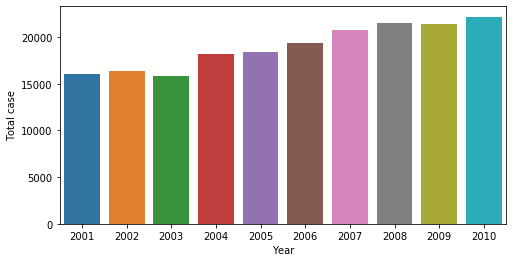

In [76]:
plt.figure(figsize=(8,4))
sns.barplot(x='Year',y='Total case',data=Total_by_year,)
plt.show()

No of total victims are increasing year by year, excep of year 2003

In [31]:
Total_by_state = data_total.groupby('Area').sum().reset_index()

In [32]:
Total_by_state.head()

,Area,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
0,Andaman & Nicobar Islands,20055,84,0,7,8,44,21,4,0,84
1,Andhra Pradesh,20055,10696,0,430,1255,2011,5631,1270,99,10696
2,Arunachal Pradesh,20055,412,0,19,48,10,316,19,0,412
3,Assam,20055,12762,0,46,153,409,8507,3552,95,12762
4,Bihar,20055,11263,0,31,102,500,8494,2097,39,11263


In [60]:
Total_by_state.shape

(35, 11)

In [33]:
#1st lets check for the state which has highest reported and unreported cases

In [34]:
Reported_by_state = Total_by_state[Total_by_state["Reported"]>0].sort_values(by="Reported",ascending=False)
Reported_by_state.head()

,Area,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
19,Madhya Pradesh,20055,29256,1,708,2499,5554,14532,5783,181,29257
34,West Bengal,20055,16378,0,63,156,273,12586,3290,10,16378
32,Uttar Pradesh,20055,15053,0,363,1424,3092,8076,2086,12,15053
20,Maharashtra,20055,14446,59,940,1305,4152,6560,1485,63,14505
3,Assam,20055,12762,0,46,153,409,8507,3552,95,12762


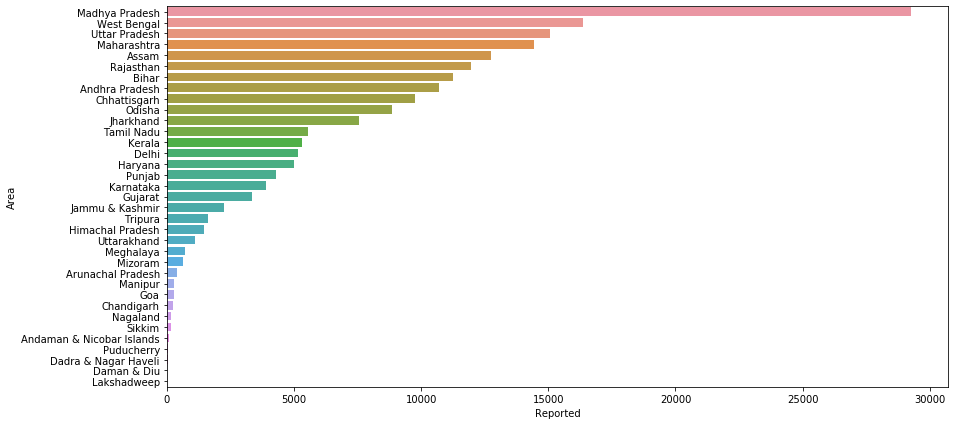

In [35]:
plt.figure(figsize=(14,7))
sns.barplot(x="Reported",y="Area",data = Reported_by_state)
plt.show()

Madhya Pradesh has the most number of Reported cases

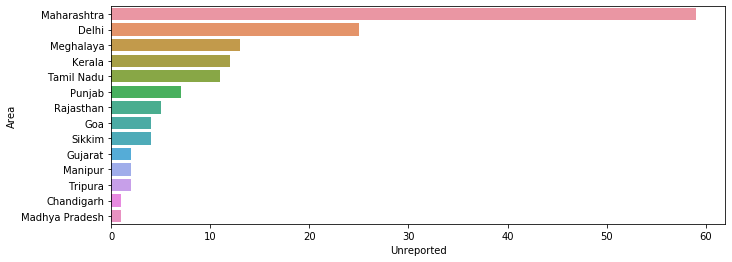

In [36]:
Unreported_by_state = Total_by_state[Total_by_state["Unreported"]>0].sort_values(by="Unreported",ascending=False)
plt.figure(figsize=(11,4))
sns.barplot(x="Unreported",y="Area",data = Unreported_by_state)
plt.show()

Maharashtra has the most number of Un-reported cases.

In [37]:
#with the above graphs it is clear that Madhyapradesh has the highest number of total_victims. Lets see it graphically and numbers

worst_10 = Total_by_state.sort_values(by="Total case",ascending=False).head(10)

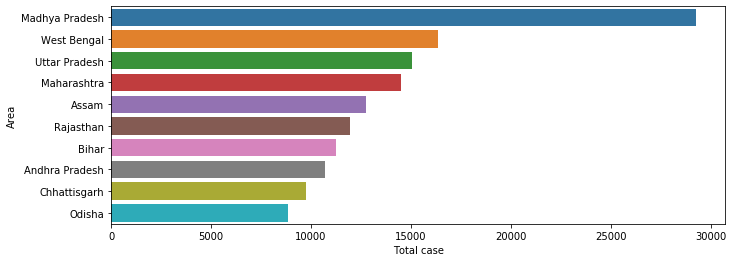

In [38]:
plt.figure(figsize=(11,4))
sns.barplot(x="Total case",y="Area",data = worst_10)
plt.show()

# EXPLORING CASES OF DELHI

In [39]:
del_total = data_total[data_total['Area']=='Delhi']
del_total

,Area,Year,Subgroup,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
270,Delhi,2001,Total Rape Victims,381,2,48,81,154,59,41,0,383
273,Delhi,2002,Total Rape Victims,403,4,35,54,52,217,49,0,407
276,Delhi,2003,Total Rape Victims,490,0,26,50,76,321,17,0,490
279,Delhi,2004,Total Rape Victims,551,0,60,126,77,282,6,0,551
282,Delhi,2005,Total Rape Victims,658,8,60,120,55,404,25,2,666
285,Delhi,2006,Total Rape Victims,623,3,70,111,267,155,21,2,626
288,Delhi,2007,Total Rape Victims,598,4,76,94,228,179,24,1,602
291,Delhi,2008,Total Rape Victims,466,4,71,95,135,133,30,6,470
294,Delhi,2009,Total Rape Victims,469,0,47,72,188,141,20,1,469
297,Delhi,2010,Total Rape Victims,507,0,51,79,174,168,34,1,507


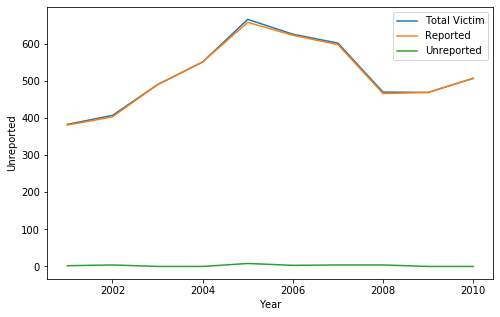

In [50]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='Total case',data=del_total,label='Total Victim')
sns.lineplot(x='Year',y='Reported',data=del_total,label='Reported')
sns.lineplot(x='Year',y='Unreported',data=del_total,label='Unreported')
plt.show()

In 2005 number of Total victims were the most an in 2005 there were few unreported cases

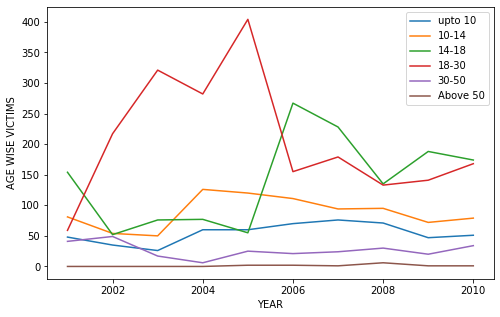

In [53]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='upto 10',data=del_total,label='upto 10')
sns.lineplot(x='Year',y='10-14',data=del_total,label='10-14')
sns.lineplot(x='Year',y='14-18',data=del_total,label='14-18')
sns.lineplot(x='Year',y='18-30',data=del_total,label='18-30')
sns.lineplot(x='Year',y='30-50',data=del_total,label='30-50')
sns.lineplot(x='Year',y='Above 50',data=del_total,label='Above 50')
plt.xlabel('YEAR')
plt.ylabel('AGE WISE VICTIMS')
plt.show()

the graphs shows victims under diff age groups from 2001 to 2010

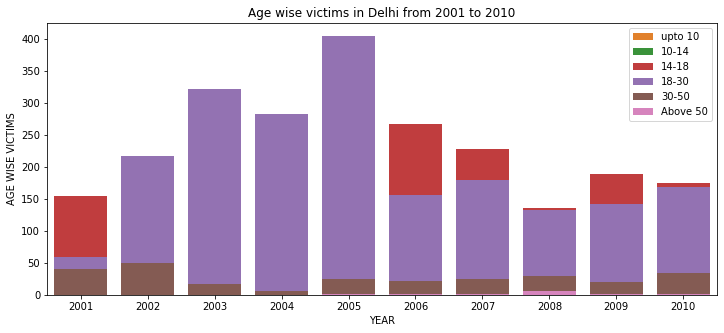

In [81]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Year',y='upto 10',data=del_total,label='upto 10',color='C1')
sns.barplot(x='Year',y='10-14',data=del_total,label='10-14',ax=ax,color='C2')
sns.barplot(x='Year',y='14-18',data=del_total,label='14-18',ax=ax,color='C3')
sns.barplot(x='Year',y='18-30',data=del_total,label='18-30',ax=ax,color='C4')
sns.barplot(x='Year',y='30-50',data=del_total,label='30-50',ax=ax,color='C5')
sns.barplot(x='Year',y='Above 50',data=del_total,label='Above 50',ax=ax,color='C6')
plt.xlabel('YEAR')
plt.ylabel('AGE WISE VICTIMS')
plt.legend()
plt.title('Age wise victims in Delhi from 2001 to 2010')
plt.show()

the graphs shows victims under diff age groups from 2001 to 2010

In [54]:
del_inc_ot = data[data["Area"]=='Delhi']
del_inc_ot.head()

,Area,Year,Subgroup,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
271,Delhi,2001,Victims of Incest Rape,9,0,3,3,2,1,0,0,9
272,Delhi,2001,Victims of Other Rape,372,2,45,78,152,58,41,0,374
274,Delhi,2002,Victims of Incest Rape,32,0,4,6,12,10,0,0,32
275,Delhi,2002,Victims of Other Rape,371,4,31,48,40,207,49,0,375
277,Delhi,2003,Victims of Incest Rape,21,0,1,5,11,4,0,0,21


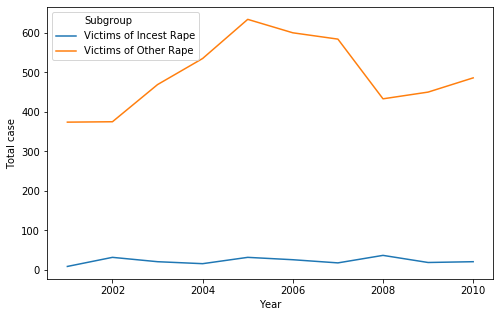

In [55]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year',y='Total case',hue='Subgroup',data=del_inc_ot)
plt.show()

This graph shows the number of total victims in Delhi categorised as Incest and Other victims

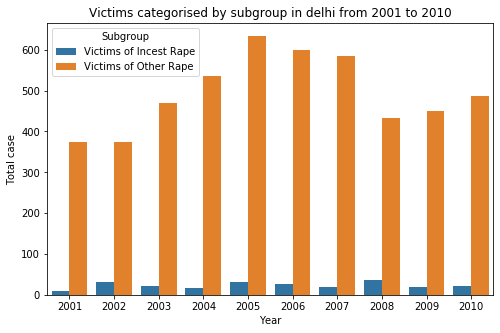

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x='Year',y='Total case',hue='Subgroup',data=del_inc_ot)
plt.title('Victims categorised by subgroup in delhi from 2001 to 2010')
plt.show()

# Analysing data of worst 5 States and then Comparing them with Delhi

In [83]:
worst_5_by_state = Total_by_state.nlargest(5,'Total case')

In [84]:
worst_5_by_state

,Area,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
19,Madhya Pradesh,20055,29256,1,708,2499,5554,14532,5783,181,29257
34,West Bengal,20055,16378,0,63,156,273,12586,3290,10,16378
32,Uttar Pradesh,20055,15053,0,363,1424,3092,8076,2086,12,15053
20,Maharashtra,20055,14446,59,940,1305,4152,6560,1485,63,14505
3,Assam,20055,12762,0,46,153,409,8507,3552,95,12762


In [90]:
Ncomparison_state = Total_by_state[Total_by_state['Area'].isin(['Madhya Pradesh','West Bengal','Uttar Pradesh','Maharashtra','Assam','Delhi'])]
Ncomparison_state.sort_values(by='Total case',ascending=False)

,Area,Year,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
19,Madhya Pradesh,20055,29256,1,708,2499,5554,14532,5783,181,29257
34,West Bengal,20055,16378,0,63,156,273,12586,3290,10,16378
32,Uttar Pradesh,20055,15053,0,363,1424,3092,8076,2086,12,15053
20,Maharashtra,20055,14446,59,940,1305,4152,6560,1485,63,14505
3,Assam,20055,12762,0,46,153,409,8507,3552,95,12762
9,Delhi,20055,5146,25,544,882,1406,2059,267,13,5171


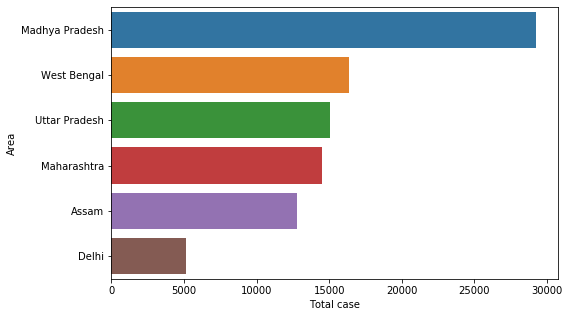

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total case',y='Area',data=Ncomparison_state.sort_values(by='Total case',ascending=False))
plt.show()

In [104]:
worst_5_by_year = data_total.groupby(['Year','Area']).sum().reset_index()

In [105]:
worst_5_by_year

,Year,Area,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
0,2001,Andaman & Nicobar Islands,3,0,0,0,3,0,0,0,3
1,2001,Andhra Pradesh,871,0,57,138,254,328,80,14,871
2,2001,Arunachal Pradesh,33,0,0,0,1,28,4,0,33
3,2001,Assam,817,0,8,73,245,370,119,2,817
4,2001,Bihar,888,0,1,15,198,562,112,0,888
5,2001,Chandigarh,18,1,0,8,4,4,3,0,19
6,2001,Chhattisgarh,959,0,25,191,218,384,137,4,959
7,2001,Dadra & Nagar Haveli,6,0,0,0,3,3,0,0,6
8,2001,Daman & Diu,0,0,0,0,0,0,0,0,0
9,2001,Delhi,381,2,48,81,154,59,41,0,383


In [118]:
Ncomparison_year = worst_5_by_year[worst_5_by_year['Area'].isin(['Madhya Pradesh','West Bengal','Uttar Pradesh','Maharashtra','Assam','Delhi'])]
Ncomparison_year.sort_values(by='Total case',ascending=False)

,Year,Area,Reported,Unreported,upto 10,10-14,14-18,18-30,30-50,Above 50,Total case
334,2010,Madhya Pradesh,3135,1,53,304,826,1364,577,12,3136
229,2007,Madhya Pradesh,3010,0,64,287,692,1399,525,43,3010
299,2009,Madhya Pradesh,2998,0,76,291,704,1405,511,11,2998
264,2008,Madhya Pradesh,2937,0,69,227,596,1548,477,20,2937
159,2005,Madhya Pradesh,2921,0,102,294,474,1396,629,26,2921
194,2006,Madhya Pradesh,2900,0,23,96,710,1402,662,7,2900
54,2002,Madhya Pradesh,2891,0,80,185,252,1549,811,14,2891
124,2004,Madhya Pradesh,2875,0,92,280,338,1673,478,14,2875
19,2001,Madhya Pradesh,2851,0,86,304,557,1250,627,27,2851
89,2003,Madhya Pradesh,2738,0,63,231,405,1546,486,7,2738


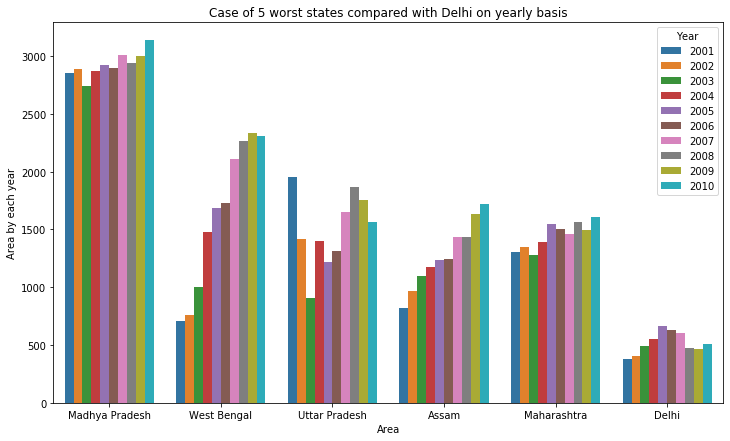

In [122]:
plt.figure(figsize=(12,7))
sns.barplot(x='Area',y='Total case',hue='Year',data=Ncomparison_year.sort_values(by='Total case',ascending=False))
plt.ylabel('Area by each year')
plt.title('Case of 5 worst states compared with Delhi on yearly basis')
plt.show()

# That is all I have analysed as of now,I hope this will be useful and helpful
thanks :)